# Titanic Dataset

### Problem Understanding 

#### dataset notes

# 1.0 Imports

In [1]:
import pandas as pd

# 2.0 Load the dataset

In [12]:
df_raw = pd.read_csv('data/train.csv')

# 3.0 Describe the dataset

In [24]:
df_raw.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 3.1 Dimension

In [18]:
print("Titanic dataset has {} rows ans {} columns.".format(*df_raw.shape))

Titanic dataset has 891 rows ans 12 columns.


## 3.2 Data types

In [17]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## 3.3 Is there any NA value in the dataset?

In [23]:
df_raw.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# 3.4 Data description

### 3.4.1 Discrete and Continuous

In [33]:
stats = df_raw.describe()

stats.loc['median'] = df_raw.median().tolist()
stats.loc['var'] = df_raw.var().tolist()
stats.loc['skew'] = df_raw.skew().tolist()
stats.loc['kurt'] = df_raw.kurtosis().tolist()

stats.transpose()

,count,mean,std,min,25%,50%,75%,max,median,var,skew,kurt
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000,446.0000,66231.000000,0.000000,-1.200000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000,0.0000,0.236772,0.478523,-1.775005
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000,3.0000,0.699015,-0.630548,-1.280015
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000,28.0000,211.019125,0.389108,0.178274
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000,0.0000,1.216043,3.695352,17.880420
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000,0.0000,0.649728,2.749117,9.778125
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292,14.4542,2469.436846,4.787317,33.398141


### 3.4.2 Categorical

In [38]:
df_raw.describe(include=['O']).transpose()

,count,unique,top,freq
Name,891,891,"Leitch, Miss. Jessie Wills",1
Sex,891,2,male,577
Ticket,891,681,1601,7
Cabin,204,147,C23 C25 C27,4
Embarked,889,3,S,644


In [53]:
df_raw['Cabin'].head(30)

0             NaN
1             C85
2             NaN
3            C123
4             NaN
5             NaN
6             E46
7             NaN
8             NaN
9             NaN
10             G6
11           C103
12            NaN
13            NaN
14            NaN
15            NaN
16            NaN
17            NaN
18            NaN
19            NaN
20            NaN
21            D56
22            NaN
23             A6
24            NaN
25            NaN
26            NaN
27    C23 C25 C27
28            NaN
29            NaN
Name: Cabin, dtype: object

# 3.5 Are the classes balanced?

In [32]:
df_raw['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

# 4.0 Feature Engineering

In [317]:
df_fe = df_raw.copy()

## 4.1 Feature filtering

In [318]:
cols_to_drop = ['Name', 'PassengerId']
df_fe.drop(columns = cols_to_drop, inplace=True, errors='ignore')

## 4.2 Label encoding

In [319]:
from collections import defaultdict
from sklearn.preprocessing import LabelEncoder

obj_list = df_fe.select_dtypes(include = "object").columns
d = dict()

for col in obj_list:
    d[col] = LabelEncoder()
    d[col].fit(df_fe[df_fe[col].notnull()][col])

for k,v in d.items():
    df_fe[k] = df_fe[k].apply(lambda x: d[k].transform([x])[0] if type(x) == str else x)

In [320]:
df_fe.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

## 4.3 Fillout NAs

In [321]:
#from fancyimpute import KNN, NuclearNormMinimization, SoftImpute, BiScaler

In [322]:
from sklearn.impute import KNNImputer

knn_impute_scores = KNNImputer(n_neighbors=3).fit_transform(df_fe)
df_fe_imp = pd.DataFrame(knn_impute_scores, columns = df_fe.columns)

In [323]:
df_fe_imp.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.647587,29.585619,0.523008,0.381594,338.528620,32.204208,106.032922,1.534231
std,0.486592,0.836071,0.477990,13.497650,1.102743,0.806057,200.850657,49.693429,33.841230,0.791761
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,21.000000,0.000000,0.000000,158.500000,7.910400,92.500000,1.000000
50%,0.000000,3.000000,1.000000,28.500000,0.000000,0.000000,337.000000,14.454200,116.000000,2.000000
75%,1.000000,3.000000,1.000000,37.000000,1.000000,0.000000,519.500000,31.000000,132.000000,2.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,680.000000,512.329200,146.000000,2.000000


In [325]:
df_eda = df_fe_imp.copy()

Univariate Analysis

TypeError: unsupported operand type(s) for -: 'str' and 'float'

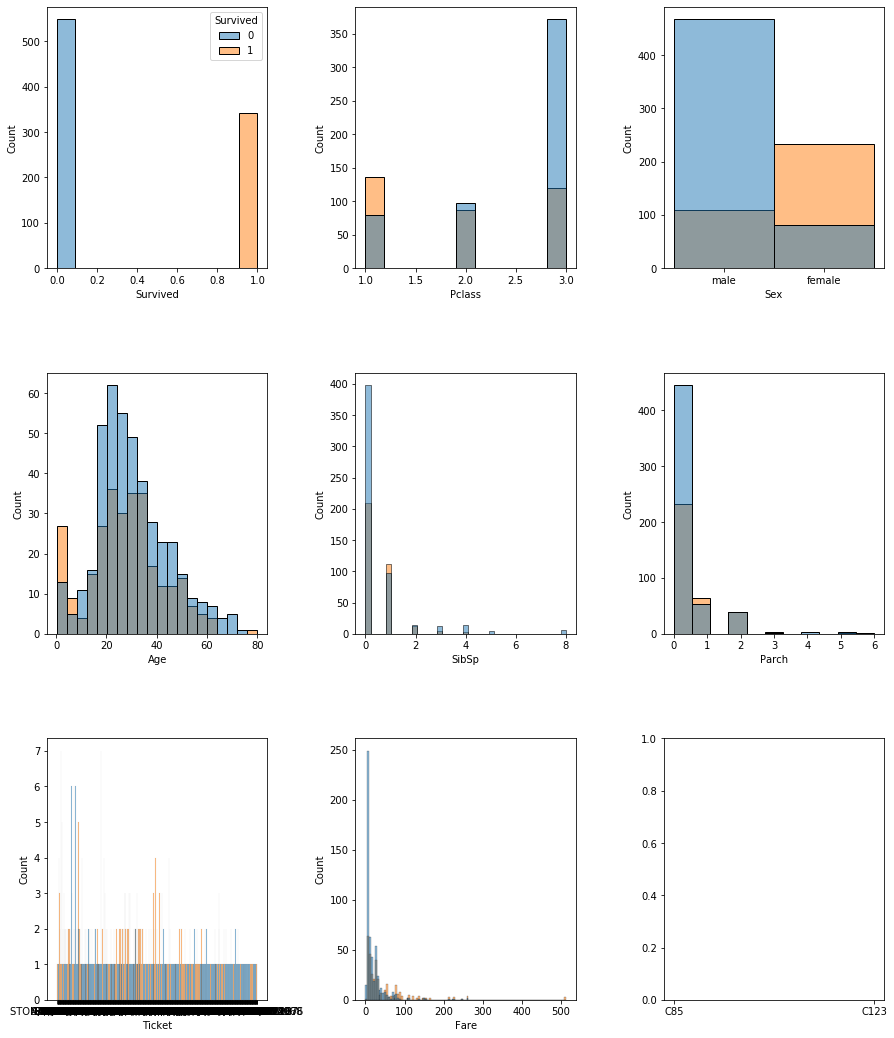

In [370]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15,25)

column_class = 'Survived'

fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.4)

i = 1
for col in df_raw.select_dtypes(include = ['int64', 'float64']).columns:
    if col in df_eda.columns:
        ax = fig.add_subplot(4, 3, i)
        sns.histplot(df_raw, x=col, hue=column_class, ax=ax)
        if i > 1: ax.get_legend().remove()
        i+= 1

plt.show()

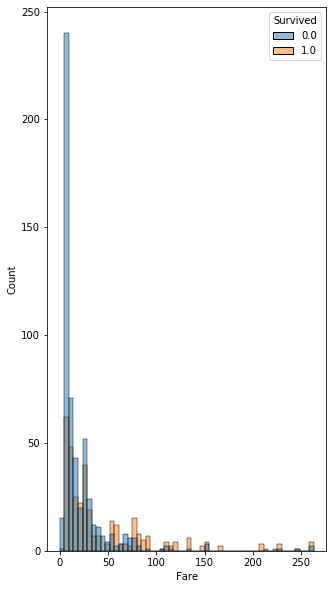

In [355]:
plt.rcParams["figure.figsize"] = (5,10)
ax = sns.histplot(df_eda[df_eda['Fare'] < 300], x='Fare', hue=column_class, bins=bins);

In [357]:
pd.cut(df_eda['Fare'], bins=bins).value_counts().head()

(4.696, 9.393]      302
(9.393, 14.089]     119
(23.482, 28.179]     92
(14.089, 18.786]     68
(28.179, 32.875]     43
Name: Fare, dtype: int64

In [364]:
df_raw.select_dtypes(exclude = ['int64', 'float64']).columns

Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')

In [365]:
df_raw['Ticket'].value_counts().head()

1601        7
347082      7
CA. 2343    7
CA 2144     6
3101295     6
Name: Ticket, dtype: int64

In [366]:
df_raw['Cabin'].value_counts().head()

C23 C25 C27    4
G6             4
B96 B98        4
F2             3
C22 C26        3
Name: Cabin, dtype: int64

In [367]:
df_raw['Embarked'].value_counts().head()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [375]:
df_raw[(df_raw['Sex'] == 'male')&(df_raw['Survived'] == 1)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
21,22,1,2,"Beesley, Mr. Lawrence",male,34.0,0,0,248698,13.0000,D56,S
23,24,1,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,A6,S
36,37,1,3,"Mamee, Mr. Hanna",male,NaN,0,0,2677,7.2292,NaN,C
55,56,1,1,"Woolner, Mr. Hugh",male,NaN,0,0,19947,35.5000,C52,S
...,...,...,...,...,...,...,...,...,...,...,...,...
838,839,1,3,"Chip, Mr. Chang",male,32.0,0,0,1601,56.4958,NaN,S
839,840,1,1,"Marechal, Mr. Pierre",male,NaN,0,0,11774,29.7000,C47,C
857,858,1,1,"Daly, Mr. Peter Denis",male,51.0,0,0,113055,26.5500,E17,S
869,870,1,3,"Johnson, Master. Harold Theodor",male,4.0,1,1,347742,11.1333,NaN,S
